In [1]:
import pandas as pd

In [7]:
ss = pd.read_csv("D:\AI_SALES_PREDICTION\data\superstore.csv",encoding="ISO-8859-1")
ss.head()
ss.describe()

<>:1: SyntaxWarning: invalid escape sequence '\A'
<>:1: SyntaxWarning: invalid escape sequence '\A'
C:\Users\Harshan B\AppData\Local\Temp\ipykernel_6800\130585839.py:1: SyntaxWarning: invalid escape sequence '\A'
  ss = pd.read_csv("D:\AI_SALES_PREDICTION\data\superstore.csv",encoding="ISO-8859-1")


,Discount,è®°å½æ°,Profit,Quantity,Row.ID,Sales,Shipping.Cost,Year,weeknum
count,51290.000000,51290.0,51290.000000,51290.000000,51290.00000,51290.000000,51290.000000,51290.000000,51290.000000
mean,0.142908,1.0,28.610982,3.476545,25645.50000,246.498440,26.375818,2012.777208,31.287112
std,0.212280,0.0,174.340972,2.278766,14806.29199,487.567175,57.296810,1.098931,14.429795
min,0.000000,1.0,-6599.978000,1.000000,1.00000,0.000000,0.002000,2011.000000,1.000000
25%,0.000000,1.0,0.000000,2.000000,12823.25000,31.000000,2.610000,2012.000000,20.000000
50%,0.000000,1.0,9.240000,3.000000,25645.50000,85.000000,7.790000,2013.000000,33.000000
75%,0.200000,1.0,36.810000,5.000000,38467.75000,251.000000,24.450000,2014.000000,44.000000
max,0.850000,1.0,8399.976000,14.000000,51290.00000,22638.000000,933.570000,2014.000000,53.000000


In [ ]:
clist = ss.columns
print(clist)

Index(['Category', 'City', 'Country', 'Customer.ID', 'Customer.Name',
       'Discount', 'Market', 'è®°å½æ°', 'Order.Date', 'Order.ID',
       'Order.Priority', 'Product.ID', 'Product.Name', 'Profit', 'Quantity',
       'Region', 'Row.ID', 'Sales', 'Segment', 'Ship.Date', 'Ship.Mode',
       'Shipping.Cost', 'State', 'Sub.Category', 'Year', 'Market2', 'weeknum'],
      dtype='object')


In [10]:
ss.isnull().sum()

Category          0
City              0
Country           0
Customer.ID       0
Customer.Name     0
Discount          0
Market            0
è®°å½æ°         0
Order.Date        0
Order.ID          0
Order.Priority    0
Product.ID        0
Product.Name      0
Profit            0
Quantity          0
Region            0
Row.ID            0
Sales             0
Segment           0
Ship.Date         0
Ship.Mode         0
Shipping.Cost     0
State             0
Sub.Category      0
Year              0
Market2           0
weeknum           0
dtype: int64

In [19]:
ss.duplicated().sum()

np.int64(0)

In [15]:
ss.nunique()

Category              3
City               3636
Country             147
Customer.ID        4873
Customer.Name       795
Discount             27
Market                7
è®°å½æ°             1
Order.Date         1430
Order.ID          25035
Order.Priority        4
Product.ID        10292
Product.Name       3788
Profit            24575
Quantity             14
Region               13
Row.ID            51290
Sales              2246
Segment               3
Ship.Date          1464
Ship.Mode             4
Shipping.Cost     16877
State              1094
Sub.Category         17
Year                  4
Market2               6
weeknum              53
dtype: int64

In [18]:
cols = ["Customer.ID","Discount","Order.Date","Order.ID","Product.ID","Profit","Quantity","Row.ID","Sales","Ship.Date","Shipping.Cost"]
ss.value_counts(cols)

Customer.ID  Discount  Order.Date               Order.ID         Product.ID       Profit     Quantity  Row.ID  Sales  Ship.Date                Shipping.Cost
ZD-219254    0.2       2013-07-09 00:00:00.000  CA-2013-152471   TEC-PH-10002824   51.4975   5         35111   824    2013-07-09 00:00:00.000  69.66            1
AA-103151    0.0       2013-12-31 00:00:00.000  IN-2013-58152    FUR-BO-10000961   179.7600  4         21292   499    2014-01-06 00:00:00.000  30.63            1
                       2014-12-23 00:00:00.000  IN-2014-55191    OFF-BI-10004700   13.3200   3         21642   46     2014-12-29 00:00:00.000  2.57             1
             0.1       2014-08-25 00:00:00.000  ID-2014-42388    FUR-FU-10004780  -9.9300    1         25801   99     2014-08-30 00:00:00.000  14.44            1
                                                                 OFF-AP-10002960  -17.2200   5         25800   256    2014-08-30 00:00:00.000  26.93            1
                                 

In [22]:

ss["Order Date"] = pd.to_datetime(ss["Order Date"]).dt.date  
ss["Ship Date"] = pd.to_datetime(ss["Ship Date"]).dt.date  

# Verify the change  
print(ss[["Order Date", "Ship Date"]].head())

   Order Date   Ship Date
0  2011-01-07  2011-01-09
1  2011-01-21  2011-01-26
2  2011-08-05  2011-08-09
3  2011-08-05  2011-08-09
4  2011-09-29  2011-10-03


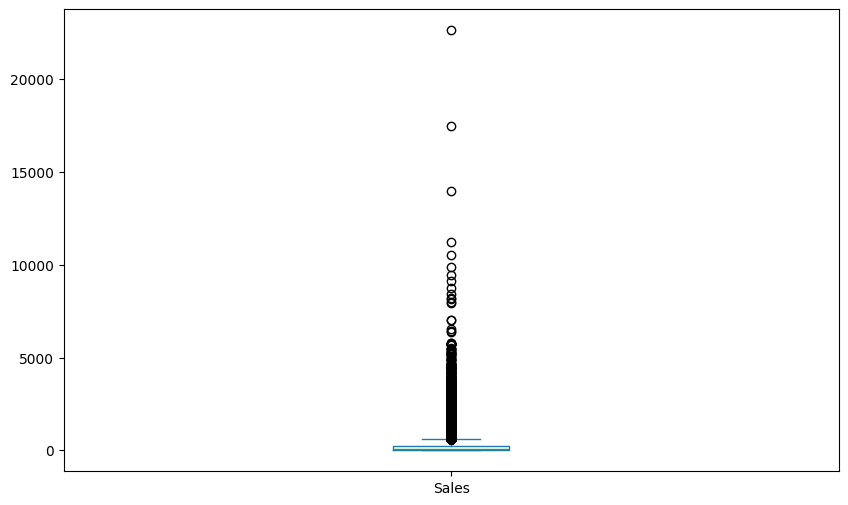

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
ssp = ss["Sales"].plot(kind = "box", figsize=(10,6))

In [27]:
Q1 = ss["Sales"].quantile(0.25)
Q3 = ss["Sales"].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 - 1.5 * IQR


outliers = ss[(ss["Sales"] < lower_bound) | (ss["Sales"] > upper_bound)]
print(outliers[["Sales"]])

       Sales
0         19
1         19
2         21
3        111
4          6
...      ...
51285     69
51286      9
51287     12
51288     90
51289    154

[51290 rows x 1 columns]


In [28]:
import numpy as np
ss["Sales"] = np.log1p(ss["Sales"])

<Axes: ylabel='Frequency'>

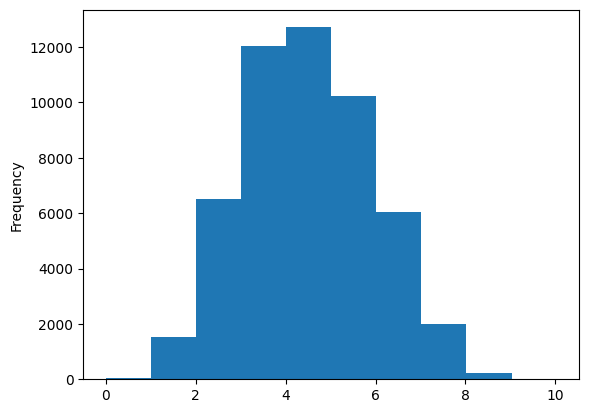

In [29]:
ss['Sales'].plot(kind="hist")

In [30]:
ss.to_csv("D:/AI_SALES_PREDICTION/data/modified_superstore.csv", index=False)

In [31]:
print(ss["Category"].unique())  
print(ss["Discount"].describe())  
print(ss["Profit"].describe())  

['Office Supplies' 'Technology' 'Furniture']
count    51290.000000
mean         0.142908
std          0.212280
min          0.000000
25%          0.000000
50%          0.000000
75%          0.200000
max          0.850000
Name: Discount, dtype: float64
count    51290.000000
mean        28.610982
std        174.340972
min      -6599.978000
25%          0.000000
50%          9.240000
75%         36.810000
max       8399.976000
Name: Profit, dtype: float64


In [32]:
ss["Order Date"] = pd.to_datetime(ss["Order Date"])
ss["Order Year"] = ss["Order Date"].dt.year  
ss["Order Month"] = ss["Order Date"].dt.month  
ss["Order Quarter"] = ss["Order Date"].dt.quarter  

In [33]:
print("Correlation between Discount and Sales:", ss["Discount"].corr(ss["Sales"]))
print("Correlation between Sales and Profit:", ss["Sales"].corr(ss["Profit"]))
print("Correlation between Discount and Profit:", ss["Discount"].corr(ss["Profit"]))

Correlation between Discount and Sales: -0.2000678309075624
Correlation between Sales and Profit: 0.2689561977586433
Correlation between Discount and Profit: -0.31649017182727107


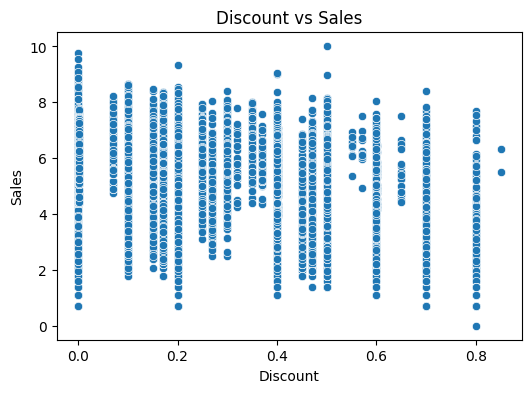

In [37]:
import seaborn as sns
plt.figure(figsize=(6,4))
sns.scatterplot(x=ss["Discount"], y=ss["Sales"])
plt.title("Discount vs Sales")
plt.show()

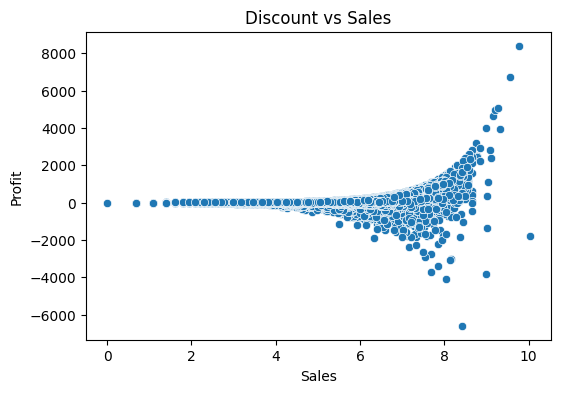

In [ ]:
import seaborn as sns
plt.figure(figsize=(6,4))
sns.scatterplot(x=ss["Sales"], y=ss["Profit"])
plt.title("Profit vs Sales")
plt.show()

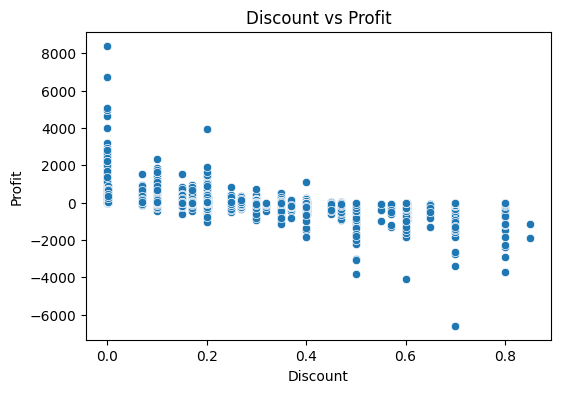

In [39]:
import seaborn as sns
plt.figure(figsize=(6,4))
sns.scatterplot(x=ss["Discount"], y=ss["Profit"])
plt.title("Discount vs Profit")
plt.show()